In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import os
from scipy.stats import skew, kurtosis, normaltest

In [33]:
df = pd.read_excel("../data/ER_data.xlsx")

# --- Remove duplicated empty columns (those ending with .1) ---
df = df[[c for c in df.columns if not c.endswith(".1")]]

# --- Recompute the ERQ / RRS columns after cleaning ---
erq_cols = [c for c in df.columns if c.startswith("ERQ_")]
rrs_cols = [c for c in df.columns if c.startswith("RRS_")]

print("ERQ columns:", erq_cols)
print("RRS columns:", rrs_cols)

base_cols = [
    "ID",
    "ResponseId",
    "age",
    "child_age",
    "sex",
    "n_children",
    "child_gender",
    "residence",
    "LocationLatitude",
    "LocationLongitude",
]

text_cols = [
    "Event",
    "EER_text",
    "notes",
]

selected_cols = base_cols + text_cols + erq_cols + rrs_cols

main_df = df[selected_cols].copy()

print(len(main_df))

main_df[erq_cols].dropna(inplace=True)
main_df[rrs_cols].dropna(inplace=True)

print(len(main_df))

main_df["ERQ_mean"] = main_df[erq_cols].mean(axis=1).round(3)
main_df["RRS_mean"] = main_df[rrs_cols].mean(axis=1).round(3)

print(main_df.info())
print(main_df[["ERQ_mean", "RRS_mean"]].describe())

main_df.to_csv("ER_data_selected.csv", index=False)

ERQ columns: ['ERQ_1', 'ERQ_2', 'ERQ_3', 'ERQ_4', 'ERQ_5', 'ERQ_6', 'ERQ_7', 'ERQ_8', 'ERQ_9', 'ERQ_10']
RRS columns: ['RRS_1', 'RRS_2', 'RRS_3', 'RRS_4', 'RRS_5']
659
659
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 659 non-null    object 
 1   ResponseId         659 non-null    object 
 2   age                659 non-null    int64  
 3   child_age          576 non-null    float64
 4   sex                659 non-null    int64  
 5   n_children         576 non-null    float64
 6   child_gender       575 non-null    float64
 7   residence          659 non-null    object 
 8   LocationLatitude   108 non-null    float64
 9   LocationLongitude  108 non-null    float64
 10  Event              659 non-null    object 
 11  EER_text           426 non-null    object 
 12  notes              194 non-null    object 
 13

/var/folders/t8/ffgjly3d0c90vfldr57f29q00000gn/T/ipykernel_39292/2487868793.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df[erq_cols].dropna(inplace=True)
/var/folders/t8/ffgjly3d0c90vfldr57f29q00000gn/T/ipykernel_39292/2487868793.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df[rrs_cols].dropna(inplace=True)


         ERQ_mean    RRS_mean
count  588.000000  588.000000
mean     4.153401    2.104876
std      0.900940    0.697472
min      1.000000    1.000000
25%      3.600000    1.600000
50%      4.150000    2.000000
75%      4.700000    2.600000
max      7.000000    4.000000

Correlation between ERQ and RRS
          ERQ_mean  RRS_mean
ERQ_mean  1.000000 -0.020318
RRS_mean -0.020318  1.000000


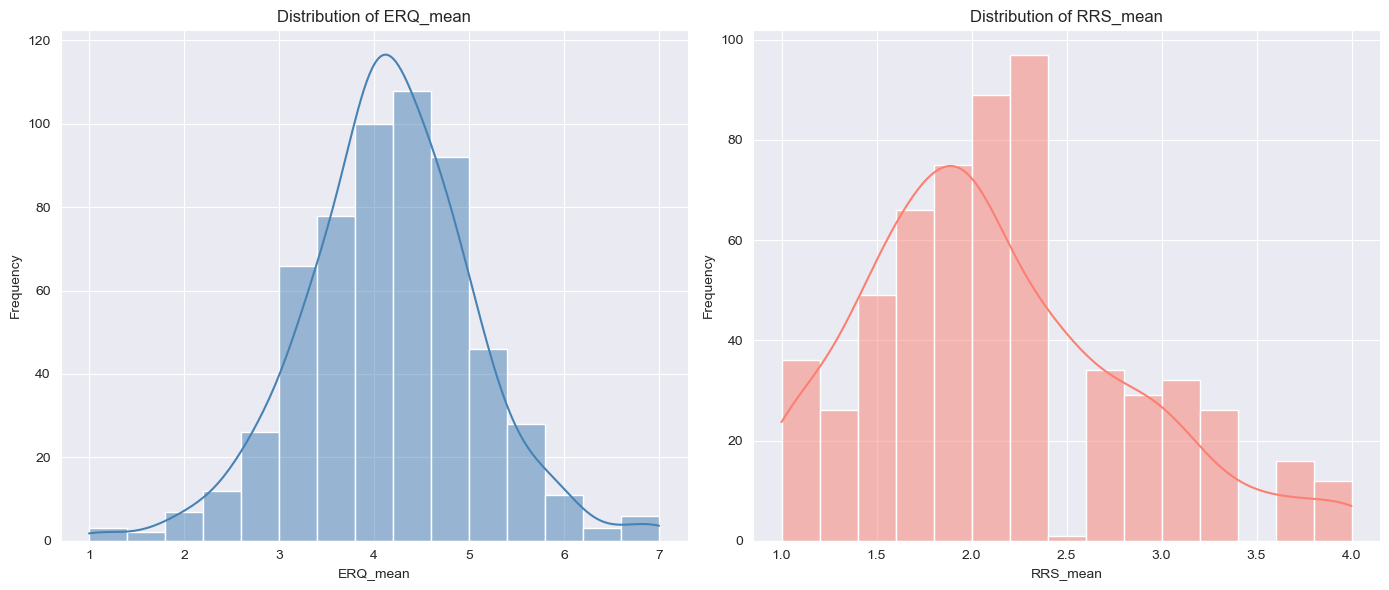

===== ERQ_mean Distribution =====
Skewness: -0.018
Kurtosis: 0.926
Normality test p-value: 0.0027

===== RRS_mean Distribution =====
Skewness: 0.65
Kurtosis: 0.05
Normality test p-value: 0.0000


In [39]:
plt.figure(figsize=(14, 6))

#histogram
# main_df["ERQ_mean"].hist(bins=20)
# main_df["RRS_mean"].hist(bins=20)

print(main_df[["ERQ_mean","RRS_mean"]].describe())
print("\nCorrelation between ERQ and RRS")
print(main_df[["ERQ_mean","RRS_mean"]].corr())
# Histogram for ERQ_mean
plt.subplot(1, 2, 1)
sns.histplot(main_df["ERQ_mean"], bins=15, kde=True, color="steelblue")
plt.title("Distribution of ERQ_mean")
plt.xlabel("ERQ_mean")
plt.ylabel("Frequency")

# Histogram for RRS_mean
plt.subplot(1, 2, 2)
sns.histplot(main_df["RRS_mean"], bins=15, kde=True, color="salmon")
plt.title("Distribution of RRS_mean")
plt.xlabel("RRS_mean")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

print("===== ERQ_mean Distribution =====")
print("Skewness:", round(skew(main_df["ERQ_mean"].dropna()), 3))
print("Kurtosis:", round(kurtosis(main_df["ERQ_mean"].dropna()), 3))

# Normality test (D'Agostino K^2)
stat, p = normaltest(main_df["ERQ_mean"].dropna())
print(f"Normality test p-value: {p:.4f}")

print("\n===== RRS_mean Distribution =====")
print("Skewness:", round(skew(main_df["RRS_mean"].dropna()), 3))
print("Kurtosis:", round(kurtosis(main_df["RRS_mean"].dropna()), 3))

stat, p = normaltest(main_df["RRS_mean"].dropna())
print(f"Normality test p-value: {p:.4f}")